# 인공신경망 

# 0. 패키지 불러오기 

In [29]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#데이터 sacling
from sklearn.preprocessing import StandardScaler

#데이터 분할
from sklearn.model_selection import train_test_split

#분류 NN(MLPClassifier)
from sklearn.neural_network import MLPClassifier

#confusion matrix
from sklearn.metrics import confusion_matrix

import graphviz
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV

#한글깨짐 방지
import matplotlib.font_manager as fm 
font_list=[font.name for font in fm.fontManager.ttflist]
font_list
plt.rcParams['font.family']='NanumBarunGothic'

# 1. 데이터 구성 

### 1-1 데이터 불러오기

In [4]:
#데이터 구성하기
df_raw=pd.read_csv("/home/piai/Downloads/데이터_1/유방암.csv", engine='python')
df_raw.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 1-2 결측치 확인하기 

In [5]:
#결측치 확인하기
df_raw.isnull().sum(axis = 0)

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

### 1-3 더미변수 생성

In [6]:
#get_dummies: 데이터의 문자형 변수에 대한 더미 변수 생성
df_raw_dummy=pd.get_dummies(df_raw)
#더미변수 생성된 데이터의 상위 5개 row확인
df_raw_dummy.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 1-4 데이터 분할하기 

In [7]:
#데이터 구성하기 -데이터 분할
df_raw_y = df_raw_dummy["diagnosis"]
df_raw_x = df_raw_dummy.drop("diagnosis", axis=1)


df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y,test_size = 0.3, random_state = 1234)
df_train_x, df_val_x, df_train_y , df_val_y = train_test_split(df_train_x, df_train_y, test_size = 3/7, random_state = 1234)
print(f'train data X size :{df_train_x.shape}')
print(f'train data Y size :{df_train_y.shape}')
print(f'test data X size :{df_test_x.shape}')
print(f'test data Y size :{df_test_y.shape}')
print(f'val data X size :{df_val_x.shape}')
print(f'val data Y size :{df_val_y.shape}')

train data X size :(227, 30)
train data Y size :(227,)
test data X size :(171, 30)
test data Y size :(171,)
val data X size :(171, 30)
val data Y size :(171,)


# 2. 모델 생성 

In [8]:
#모델 생성
nn_uncustomized = MLPClassifier(random_state = 1234)

#hidden_layer_size = (100,100) 변경 (은닉층 2개, 각 은닉층 노드 100개)
nn_uncustomized.fit(df_train_x, df_train_y)

#train 데이터 셋 정확도
print('Accuracy on training set : {:.3f}'.format(nn_uncustomized.score(df_train_x, df_train_y)))

#test 데이터 셋 정확도
print('Accuracy on val set : {:.3f}'.format(nn_uncustomized.score(df_val_x, df_val_y)))

Accuracy on training set : 0.934
Accuracy on val set : 0.912


### 2-1 MLPClassifier 모델 parameter 변경 - Hidden layer : 은닉층 변경

In [9]:
#train 및 val 설명력 결과 저장
train_accuracy = []
val_accuracy = []

#hidden_layer_sizes : 은닉층 노드수 변경 (20,40,60,80,100,120,140,160)
para_hidden= [hidden * 20 for hidden in range(1,9)]


for v_hidden in para_hidden:
    nn = MLPClassifier(random_state = 1234 , hidden_layer_sizes = v_hidden)
# nn = MLPClassifier(hidden_layer_sizes = (v_hidden, v_hidden), random_state = 1234) 
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    val_accuracy.append(nn.score(df_val_x, df_val_y))
    
#결과 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden['HiddenLayer'] = para_hidden
df_accuracy_hidden['Trainaccuracy'] = train_accuracy
df_accuracy_hidden['valaccuracy'] = val_accuracy
df_accuracy_hidden.round(3)

,HiddenLayer,Trainaccuracy,valaccuracy
0,20,0.630,0.637
1,40,0.890,0.871
2,60,0.938,0.906
3,80,0.930,0.924
4,100,0.934,0.912
5,120,0.930,0.906
6,140,0.938,0.912
7,160,0.916,0.901


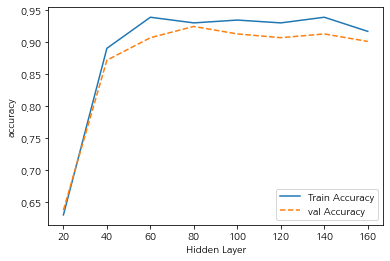

In [10]:
#모델 설명력 그래프 확인
plt.plot(para_hidden, train_accuracy, linestyle = "-", label = 'Train Accuracy')
plt.plot(para_hidden, val_accuracy, linestyle = "--", label = 'val Accuracy')
plt.xlabel('Hidden Layer')
plt.ylabel('accuracy')
plt.legend()

### 2-2 MLPClassifier 모델 parameter 변경 - Activation : 활성화 함수 변경

In [12]:
#train 및 val 설명력 결과 저장
train_accuracy = []
val_accuracy = []

#activation 변경
para_function = ['logistic','tanh','relu']

for v_function in para_function:
    nn = MLPClassifier(random_state = 1234 , 
             activation = v_function)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    val_accuracy.append(nn.score(df_val_x, df_val_y))
    
#결과 저장
df_accuracy_function = pd.DataFrame()
df_accuracy_function['ActivationFunction'] = para_function
df_accuracy_function['Trainaccuracy'] = train_accuracy
df_accuracy_function['valaccuracy'] = val_accuracy
df_accuracy_function.round(3)

,ActivationFunction,Trainaccuracy,valaccuracy
0,logistic,0.921,0.906
1,tanh,0.934,0.912
2,relu,0.934,0.912


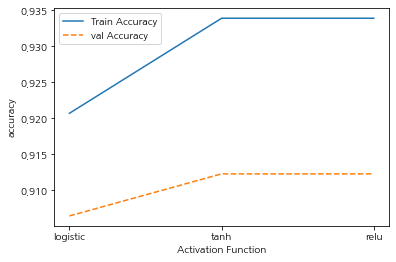

In [13]:
#모델 설명력 그래프 확인
plt.plot(para_function, train_accuracy, linestyle = "-", label = 'Train Accuracy')
plt.plot(para_function, val_accuracy, linestyle = "--", label = 'val Accuracy')
plt.xlabel('Activation Function')
plt.ylabel('accuracy')
plt.legend()

### 3. Scale 조정 

### 3-1 MLPClassifier 모델 parameter 변경 - Standardscaler: 설명변수 scale 변경

In [15]:
#scale 변환 - Standardscaler: 설명변수 scale 변경
#변수명 저장
v_feature_name = df_train_x.columns
#StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [16]:
#scaled 된 데이터 train, test, val로 분할

df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.3, random_state = 1234)
df_scaled_train_x, df_scaled_val_x = train_test_split(df_scaled_train_x, test_size = 3/7, random_state = 1234)

print(f'train data X size :{df_train_x.shape}')
print(f'test data X size :{df_test_x.shape}')
print(f'val data X size :{df_val_x.shape}')

train data X size :(227, 30)
test data X size :(171, 30)
val data X size :(171, 30)


### 3-2 scale 조절 후 MLPClassifier 모델 재실행

In [18]:
#scaled 후 분할된 데이터 accuracy 측정

nn_scaled = MLPClassifier(random_state = 1234)
nn_scaled.fit(df_scaled_train_x, df_train_y)

print("Accuracy on training set:{:.3f}".format(nn_scaled.score(df_scaled_train_x, df_train_y)))
print("Accuracy on val set:{:.3f}".format(nn_scaled.score(df_scaled_val_x, df_val_y)))

Accuracy on training set:0.996
Accuracy on val set:0.959


### 3-3 Hidden Layer: 은닉층 변경

In [19]:
#train 및 test 설명력 결과 저장
train_accuracy = []
val_accuracy = []

#hidden_layer_sizes : 은닉층 변경 (20~240, by 30)
para_hidden= [20 * hidden for hidden in range(1,11)]

for v_hidden in para_hidden:
    nn = MLPClassifier(random_state = 1234 , 
             hidden_layer_sizes = (v_hidden,v_hidden))
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    val_accuracy.append(nn.score(df_scaled_val_x, df_val_y))
    
#결과 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden['HiddenLayer'] = para_hidden
df_accuracy_hidden['Trainaccuracy'] = train_accuracy
df_accuracy_hidden['valaccuracy'] = val_accuracy
df_accuracy_hidden.round(3)

,HiddenLayer,Trainaccuracy,valaccuracy
0,20,0.996,0.965
1,40,0.996,0.977
2,60,1.000,0.965
3,80,1.000,0.977
4,100,1.000,0.971
5,120,1.000,0.953
6,140,1.000,0.965
7,160,1.000,0.953
8,180,1.000,0.959
9,200,1.000,0.953


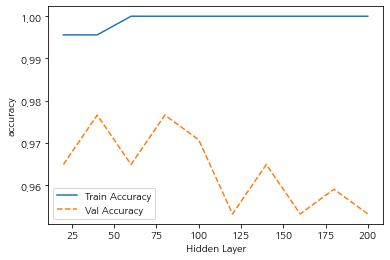

In [20]:
#모델 설명력 그래프 확인
plt.plot(para_hidden, train_accuracy, linestyle = "-", label = 'Train Accuracy')
plt.plot(para_hidden, val_accuracy, linestyle = "--", label = 'Val Accuracy')
plt.xlabel('Hidden Layer')
plt.ylabel('accuracy')
plt.legend()

### 3-4 Activation: 활성화 함수 변경

In [21]:
# train 및 test 정확도 결과 저장용
train_accuracy=[]; 
val_accuracy=[]

#activation 변경
para_function=["logistic","tanh","relu"]
for v_function in para_function:
    nn=MLPClassifier(activation=v_function, hidden_layer_sizes=(80,80), random_state=1234)
    nn.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    val_accuracy.append(nn.score(df_scaled_val_x,df_val_y))

# 데이터 테이블로 저장
df_accuracy_function=pd.DataFrame()
df_accuracy_function['MinSamplesSplit']= para_function
df_accuracy_function['TrainAccuracy']=train_accuracy
df_accuracy_function['valAccuracy']=val_accuracy

# Activation function별 정확도 테이블
df_accuracy_function.round(3)

,MinSamplesSplit,TrainAccuracy,valAccuracy
0,logistic,0.996,0.965
1,tanh,1.000,0.959
2,relu,1.000,0.977


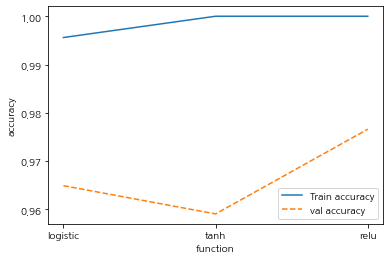

In [22]:
# Activation function별 정확도 그래프 확인
plt.plot(para_function,train_accuracy,linestyle='-',label='Train accuracy')
plt.plot(para_function,val_accuracy,linestyle='--',label='val accuracy')
plt.ylabel('accuracy')
plt.xlabel('function')
plt.legend()
# Activation Function 지정(임의)
activation='relu'

### 3-5 Solver: 가중치 최적화 변경

In [23]:
# train 및 test 정확도 결과 저장용
train_accuracy=[]
val_accuracy=[]
# solver 변경
para_solver=['lbfgs','sgd','adam']
for v_solver in para_solver:
    nn=MLPClassifier(solver=v_solver,activation='relu',hidden_layer_sizes=(80,80),random_state=1234)
    nn.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    val_accuracy.append(nn.score(df_scaled_val_x,df_val_y))
# 데이터 테이블로 저장
df_accuracy_solver=pd.DataFrame()
df_accuracy_solver['Estimators']=para_solver
df_accuracy_solver['TrainScore']=train_accuracy
df_accuracy_solver['valScore']=val_accuracy
# Solver별 정확도 테이블
df_accuracy_solver.round(3)

,Estimators,TrainScore,valScore
0,lbfgs,1.000,0.947
1,sgd,0.996,0.971
2,adam,1.000,0.977


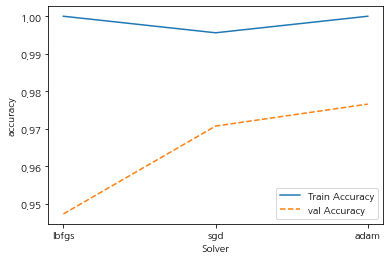

In [24]:
# 정확도 그래프 표현
plt.plot(para_solver,train_accuracy,linestyle='-',label='Train Accuracy')
plt.plot(para_solver,val_accuracy,linestyle='--',label='val Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Solver')
plt.legend()

### 3-6 mini batch 변경

In [25]:
# train 및 val정확도 결과 저장용
train_accuracy = []
val_accuracy = []
# Mini Batch 변경 :
para_batch = [20 * batch for batch in range(1,10)]
for v_batch in para_batch:
    nn = MLPClassifier(batch_size = v_batch, solver = "adam", activation="relu", hidden_layer_sizes = (80,80), random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    val_accuracy.append(nn.score(df_scaled_val_x, df_val_y))
df_accuracy_batch = pd.DataFrame()
df_accuracy_batch["Mini Batch"] = para_batch
df_accuracy_batch["TrainAccuracy"] = train_accuracy
df_accuracy_batch["valAccuracy"] = val_accuracy
df_accuracy_batch.round(3)

,Mini Batch,TrainAccuracy,valAccuracy
0,20,1.0,0.971
1,40,1.0,0.971
2,60,1.0,0.971
3,80,1.0,0.971
4,100,1.0,0.977
5,120,1.0,0.971
6,140,1.0,0.971
7,160,1.0,0.971
8,180,1.0,0.965


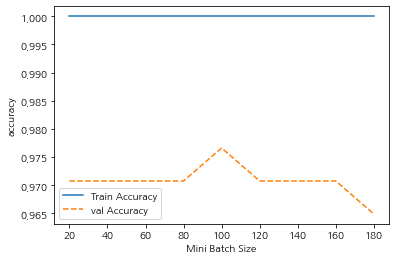

In [26]:
# 정확도 그래프 표현
plt.plot(para_batch, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_batch, val_accuracy, linestyle="--", label="val Accuracy")
plt.ylabel("accuracy")
plt.xlabel("Mini Batch Size")
plt.legend()

# 4. 최종 모델 선택

In [27]:
#최종모델
nn_final = MLPClassifier(hidden_layer_sizes = (80,80), activation = 'relu', solver = 'adam', 
                batch_size =100 , random_state = 1234)
nn_final.fit(df_scaled_train_x, df_train_y)

#평가
y_pred = nn_final.predict(df_scaled_test_x)

#train 데이터 셋 정확도
print('Accuracy on training set : {:3f}'.format(nn_final.score(df_scaled_train_x, df_train_y)))

#test 데이터 셋 정확도
print('Accuracy on test set : {:3f}'.format(nn_final.score(df_scaled_test_x, df_test_y)))

#confusion matrix
print('Confusion matrix: \n {}'.format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set : 1.000000
Accuracy on test set : 0.947368
Confusion matrix: 
 [[103   2]
 [  7  59]]


# KNN

# 0. 패키지 불러오기 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 sacling
from sklearn.preprocessing import StandardScaler

# 데이터 분할
from sklearn.model_selection import train_test_split

# 분류 KNN
from sklearn.neighbors import KNeighborsClassifier

# 최적 모델, 파라미터 탐색 
from sklearn.model_selection import GridSearchCV

# 모델 성능 평가
from sklearn.metrics import confusion_matrix